*Include all necessary imports*

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from math import radians, cos, sin, asin, sqrt

*Unzip all uploaded files so we can access them*

In [ ]:
!unzip baseline_locations_test.csv.zip
!unzip baseline_locations_train.csv.zip
!unzip sample_submission.csv.zip

Archive:  baseline_locations_test.csv.zip
  inflating: baseline_locations_test.csv  
Archive:  baseline_locations_train.csv.zip
  inflating: baseline_locations_train.csv  
unzip:  cannot find or open sample_submission.csv.zip, sample_submission.csv.zip.zip or sample_submission.csv.zip.ZIP.


In [ ]:
!unzip sample3.zip

Archive:  sample3.zip
   creating: sample3/Mi8/
  inflating: sample3/Mi8/ground_truth.csv  
  inflating: sample3/Mi8/Mi8_derived.csv  
  inflating: sample3/Mi8/Mi8_GnssLog.txt  
   creating: sample3/Mi8/supplemental/
  inflating: sample3/Mi8/supplemental/Mi8_GnssLog.20o  
  inflating: sample3/Mi8/supplemental/SPAN_Mi8_10Hz.nmea  
   creating: sample3/Pixel4/
  inflating: sample3/Pixel4/ground_truth.csv  
  inflating: sample3/Pixel4/Pixel4_derived.csv  
  inflating: sample3/Pixel4/Pixel4_GnssLog.txt  
   creating: sample3/Pixel4/supplemental/
  inflating: sample3/Pixel4/supplemental/Pixel4_GnssLog.20o  
  inflating: sample3/Pixel4/supplemental/SPAN_Pixel4_10Hz.nmea  
   creating: sample3/Pixel4Modded/
  inflating: sample3/Pixel4Modded/ground_truth.csv  
  inflating: sample3/Pixel4Modded/Pixel4Modded_derived.csv  
  inflating: sample3/Pixel4Modded/Pixel4Modded_GnssLog.txt  
   creating: sample3/Pixel4Modded/supplemental/
  inflating: sample3/Pixel4Modded/supplemental/Pixel4Modded_GnssLog

*Load the csv files into the respective dataframes*

In [ ]:
trainfile = pd.read_csv("baseline_locations_train.csv")
trainfile

,collectionName,phoneName,millisSinceGpsEpoch,latDeg,lngDeg,heightAboveWgs84EllipsoidM,phone
0,2020-05-14-US-MTV-1,Pixel4,1273529463442,37.423575,-122.094091,-34.06,2020-05-14-US-MTV-1_Pixel4
1,2020-05-14-US-MTV-1,Pixel4,1273529464442,37.423578,-122.094101,-33.29,2020-05-14-US-MTV-1_Pixel4
2,2020-05-14-US-MTV-1,Pixel4,1273529465442,37.423573,-122.094111,-30.99,2020-05-14-US-MTV-1_Pixel4
3,2020-05-14-US-MTV-1,Pixel4,1273529466442,37.423583,-122.094121,-32.83,2020-05-14-US-MTV-1_Pixel4
4,2020-05-14-US-MTV-1,Pixel4,1273529467442,37.423579,-122.094114,-34.49,2020-05-14-US-MTV-1_Pixel4
...,...,...,...,...,...,...,...
131337,2021-04-29-US-SJC-2,SamsungS20Ultra,1303760315000,37.334460,-121.899600,-8.09,2021-04-29-US-SJC-2_SamsungS20Ultra
131338,2021-04-29-US-SJC-2,SamsungS20Ultra,1303760316000,37.334472,-121.899583,-7.59,2021-04-29-US-SJC-2_SamsungS20Ultra
131339,2021-04-29-US-SJC-2,SamsungS20Ultra,1303760317000,37.334491,-121.899597,-8.35,2021-04-29-US-SJC-2_SamsungS20Ultra
131340,2021-04-29-US-SJC-2,SamsungS20Ultra,1303760318000,37.334495,-121.899583,-8.73,2021-04-29-US-SJC-2_SamsungS20Ultra


In [ ]:
testfile = pd.read_csv("baseline_locations_test.csv")
testfile

,collectionName,phoneName,millisSinceGpsEpoch,latDeg,lngDeg,heightAboveWgs84EllipsoidM,phone
0,2020-05-15-US-MTV-1,Pixel4,1273608785432,37.416628,-122.082053,-30.69,2020-05-15-US-MTV-1_Pixel4
1,2020-05-15-US-MTV-1,Pixel4,1273608786432,37.416646,-122.082040,-31.76,2020-05-15-US-MTV-1_Pixel4
2,2020-05-15-US-MTV-1,Pixel4,1273608787432,37.416653,-122.082039,-31.65,2020-05-15-US-MTV-1_Pixel4
3,2020-05-15-US-MTV-1,Pixel4,1273608788432,37.416607,-122.082063,-31.52,2020-05-15-US-MTV-1_Pixel4
4,2020-05-15-US-MTV-1,Pixel4,1273608789432,37.416609,-122.082073,-28.95,2020-05-15-US-MTV-1_Pixel4
...,...,...,...,...,...,...,...
91481,2021-04-29-US-SJC-3,SamsungS20Ultra,1303763185000,37.334539,-121.899383,-8.39,2021-04-29-US-SJC-3_SamsungS20Ultra
91482,2021-04-29-US-SJC-3,SamsungS20Ultra,1303763186000,37.334545,-121.899380,-7.36,2021-04-29-US-SJC-3_SamsungS20Ultra
91483,2021-04-29-US-SJC-3,SamsungS20Ultra,1303763187000,37.334551,-121.899371,-4.08,2021-04-29-US-SJC-3_SamsungS20Ultra
91484,2021-04-29-US-SJC-3,SamsungS20Ultra,1303763188000,37.334540,-121.899371,-5.70,2021-04-29-US-SJC-3_SamsungS20Ultra


In [ ]:
submission = pd.read_csv("sample_submission.csv")
submission

,phone,millisSinceGpsEpoch,latDeg,lngDeg
0,2020-05-15-US-MTV-1_Pixel4,1273608785432,37.904611,-86.481078
1,2020-05-15-US-MTV-1_Pixel4,1273608786432,37.904611,-86.481078
2,2020-05-15-US-MTV-1_Pixel4,1273608787432,37.904611,-86.481078
3,2020-05-15-US-MTV-1_Pixel4,1273608788432,37.904611,-86.481078
4,2020-05-15-US-MTV-1_Pixel4,1273608789432,37.904611,-86.481078
...,...,...,...,...
51685,2021-03-16-US-RWC-2_SamsungS20Ultra,1299971642000,37.904611,-86.481078
51686,2021-03-16-US-RWC-2_SamsungS20Ultra,1299971643000,37.904611,-86.481078
51687,2021-03-16-US-RWC-2_SamsungS20Ultra,1299971644000,37.904611,-86.481078
51688,2021-03-16-US-RWC-2_SamsungS20Ultra,1299971645000,37.904611,-86.481078


*Check the code for any missing information*

In [ ]:
trainfile.isnull().any()

collectionName                False
phoneName                     False
millisSinceGpsEpoch           False
latDeg                        False
lngDeg                        False
heightAboveWgs84EllipsoidM    False
phone                         False
dtype: bool

*Now that we see there is no missing data, we move on to establishing the path to get the ground truth data from. We use the .rglob method to get all ground truth datafiles, and store them in a list.*

In [ ]:
truth_path = Path("/content/sample3")
data_truth = (truth_path).rglob('ground_truth.csv')

data_truth



<generator object Path.rglob at 0x7f968c8f09d0>

# Model 1

*Instantiate the column names for the model data*

In [ ]:
cols = ['collectionName', 'phoneName', 'millisSinceGpsEpoch', 'latDeg',
       'lngDeg']

*Create a truth list containting all of the ground truth files in the training data, which will be populated by going through the truths list and creating datafiles from all of the ground truth csv files*

In [ ]:
truths = []

for filepath in data_truth:
    f = pd.read_csv(filepath, usecols=cols)
    truths.append(f)
truths

[           collectionName phoneName  millisSinceGpsEpoch     latDeg      lngDeg
 0     2020-05-14-US-MTV-1    Pixel4        1273529463442  37.423576 -122.094132
 1     2020-05-14-US-MTV-1    Pixel4        1273529464442  37.423576 -122.094132
 2     2020-05-14-US-MTV-1    Pixel4        1273529465442  37.423576 -122.094132
 3     2020-05-14-US-MTV-1    Pixel4        1273529466442  37.423576 -122.094132
 4     2020-05-14-US-MTV-1    Pixel4        1273529467442  37.423576 -122.094132
 ...                   ...       ...                  ...        ...         ...
 1735  2020-05-14-US-MTV-1    Pixel4        1273531198442  37.645823 -122.405608
 1736  2020-05-14-US-MTV-1    Pixel4        1273531199442  37.645823 -122.405608
 1737  2020-05-14-US-MTV-1    Pixel4        1273531200442  37.645823 -122.405608
 1738  2020-05-14-US-MTV-1    Pixel4        1273531201442  37.645823 -122.405608
 1739  2020-05-14-US-MTV-1    Pixel4        1273531202442  37.645823 -122.405608
 
 [1740 rows x 5 columns],


*Now that we have our truths, we concatenate the data to the truth dataframe*

In [ ]:
truth_data = pd.concat(truths, ignore_index=True)
truth_data

,collectionName,phoneName,millisSinceGpsEpoch,latDeg,lngDeg
0,2020-05-14-US-MTV-1,Pixel4,1273529463442,37.423576,-122.094132
1,2020-05-14-US-MTV-1,Pixel4,1273529464442,37.423576,-122.094132
2,2020-05-14-US-MTV-1,Pixel4,1273529465442,37.423576,-122.094132
3,2020-05-14-US-MTV-1,Pixel4,1273529466442,37.423576,-122.094132
4,2020-05-14-US-MTV-1,Pixel4,1273529467442,37.423576,-122.094132
...,...,...,...,...,...
8691,2020-08-06-US-MTV-2,Pixel4XL,1280791291433,37.427345,-122.069913
8692,2020-08-06-US-MTV-2,Pixel4XL,1280791292433,37.427345,-122.069913
8693,2020-08-06-US-MTV-2,Pixel4XL,1280791293433,37.427345,-122.069913
8694,2020-08-06-US-MTV-2,Pixel4XL,1280791294433,37.427345,-122.069913


*Using the necessary column data, we create a dataframe that contains relevant information in the trainfile*

In [ ]:
train = trainfile[cols]
train

,collectionName,phoneName,millisSinceGpsEpoch,latDeg,lngDeg
0,2020-05-14-US-MTV-1,Pixel4,1273529463442,37.423575,-122.094091
1,2020-05-14-US-MTV-1,Pixel4,1273529464442,37.423578,-122.094101
2,2020-05-14-US-MTV-1,Pixel4,1273529465442,37.423573,-122.094111
3,2020-05-14-US-MTV-1,Pixel4,1273529466442,37.423583,-122.094121
4,2020-05-14-US-MTV-1,Pixel4,1273529467442,37.423579,-122.094114
...,...,...,...,...,...
131337,2021-04-29-US-SJC-2,SamsungS20Ultra,1303760315000,37.334460,-121.899600
131338,2021-04-29-US-SJC-2,SamsungS20Ultra,1303760316000,37.334472,-121.899583
131339,2021-04-29-US-SJC-2,SamsungS20Ultra,1303760317000,37.334491,-121.899597
131340,2021-04-29-US-SJC-2,SamsungS20Ultra,1303760318000,37.334495,-121.899583


*Merge the data up to the third column*

In [ ]:
train = train.merge(truth_data, on=cols[:3], suffixes=("_current","_truth"))

*Create a copy of the test file*

In [ ]:
test = testfile.copy()

NameError: ignored

*Get the unique names from the train and test data for the collection name and phone name columns*

In [ ]:
print("############### collectionName unique values ##############################")
print("train: {}".format(train.collectionName.nunique()))
print(train.collectionName.unique())
print("----------------------------------------------")
print("test: {}".format(test.collectionName.nunique()))
print(test.collectionName.unique())
print("----------------------------------------------")

print("\n")

print("############### phoneName unique values ##############################")
print("train: {}".format(train.phoneName.nunique()))
print(train.phoneName.unique())
print("----------------------------------------------")
print("test: {}".format(test.phoneName.nunique()))
print(test.phoneName.unique())
print("----------------------------------------------")

############### collectionName unique values ##############################
train: 3
['2020-05-14-US-MTV-1' '2020-08-06-US-MTV-2' '2021-04-15-US-MTV-1']
----------------------------------------------
test: 19
['2020-05-15-US-MTV-1' '2020-05-28-US-MTV-1' '2020-05-28-US-MTV-2'
 '2020-06-04-US-MTV-2' '2020-06-10-US-MTV-1' '2020-06-10-US-MTV-2'
 '2020-08-03-US-MTV-2' '2020-08-13-US-MTV-1' '2021-03-16-US-MTV-2'
 '2021-03-16-US-RWC-2' '2021-03-25-US-PAO-1' '2021-04-02-US-SJC-1'
 '2021-04-08-US-MTV-1' '2021-04-21-US-MTV-1' '2021-04-22-US-SJC-2'
 '2021-04-26-US-SVL-2' '2021-04-28-US-MTV-2' '2021-04-29-US-MTV-2'
 '2021-04-29-US-SJC-3']
----------------------------------------------


############### phoneName unique values ##############################
train: 5
['Pixel4' 'Pixel4XLModded' 'Mi8' 'Pixel4XL' 'Pixel4Modded']
----------------------------------------------
test: 7
['Pixel4' 'Pixel4XL' 'Pixel4XLModded' 'Mi8' 'Pixel4Modded'
 'SamsungS20Ultra' 'Pixel5']
---------------------------------

*Use the get dummies method to create dummy data, and assign it to the train and test phone variables*

In [ ]:
train_phone = pd.get_dummies(train.loc[:,"phoneName"])
test_phone = pd.get_dummies(test.loc[:,"phoneName"])

*Check the shape of the test phone and train phone data files*

In [ ]:
print("train_phone shape:{}".format(train_phone.shape))
print("test_phone shape:{}".format(test_phone.shape))

train_phone shape:(8696, 5)
test_phone shape:(91486, 7)


*take the data from train phone, align it to be the same format with the columns of the test phone dataframe, and have that data saved to the train_phone1 and test_phone1 dataframes*

In [ ]:
train_phone1, test_phone1 = train_phone.align(test_phone, join="outer",axis=1, fill_value=0)
print("Updated train shape {}".format(train_phone.shape))
print("Updated test shape {}".format(test_phone.shape))

Updated train shape (8696, 5)
Updated test shape (91486, 7)


*concatenate the training and testing data from the train_phone1 and test_phone1 datafiles*

In [ ]:
train1 = pd.concat([train.iloc[:,3:], train_phone1], axis=1, ignore_index=False)
test1 = pd.concat([test.iloc[:,3:5], test_phone1], axis=1, ignore_index=False)

*Check the shape of the train1 and test1 datafiles while previewing the train1 and test1 columns*

In [ ]:
print("train1_shape:",train1.shape)
train1.columns
print("test1-shape:",test1.shape)
test1.columns

train1_shape: (8696, 11)
test1-shape: (91486, 9)


Index(['latDeg', 'lngDeg', 'Mi8', 'Pixel4', 'Pixel4Modded', 'Pixel4XL',
       'Pixel4XLModded', 'Pixel5', 'SamsungS20Ultra'],
      dtype='object')

*Plot the figure that shows our current data vs the predicted data*

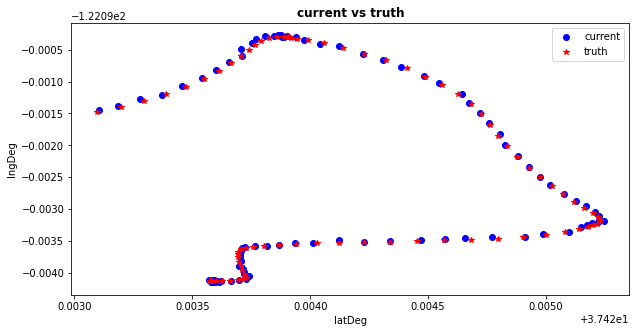

In [ ]:
plt.figure(figsize=[10,5])
plt.plot(train1["latDeg_current"][50:100],train1["lngDeg_current"][50:150],"bo",label="current")
plt.plot(train1["latDeg_truth"][50:150],train1["lngDeg_truth"][50:150],"r*",label="truth")
plt.title("current vs truth", fontweight="bold")
plt.xlabel("latDeg")
plt.ylabel("lngDeg")
plt.legend()

*Plot the figures showing the individual longitudes and latitudes*

Text(0.5, 1.0, 'lat (current vs truth)')

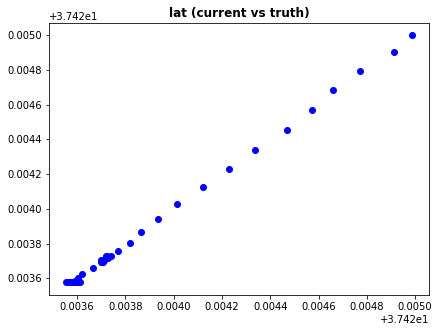

In [ ]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.plot(train1["latDeg_current"][:100],train1["latDeg_truth"][:100],"bo")
plt.title("lat (current vs truth)", fontweight="bold")

Text(0.5, 1.0, 'lng (current vs truth)')

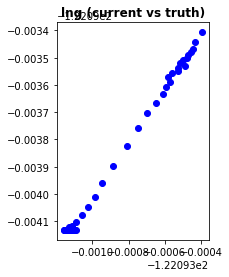

In [ ]:
plt.subplot(1,2,2)
plt.plot(train1["lngDeg_current"][:100],train1["lngDeg_truth"][:100],"bo")
plt.title("lng (current vs truth)", fontweight="bold")

In [ ]:
# for latitude
columns1 = list(train1.columns[4:])
X1,y1 = train1.loc[:,[train1.columns[0]]+columns1],train1["latDeg_truth"].values
  
#for longitude
columns2 = list(train1.columns[4:])
X2,y2 = train1.loc[:,[train1.columns[1]]+columns2],train1["lngDeg_truth"].values
train1

,latDeg_current,lngDeg_current,latDeg_truth,lngDeg_truth,Mi8,Pixel4,Pixel4Modded,Pixel4XL,Pixel4XLModded,Pixel5,SamsungS20Ultra
0,37.423575,-122.094091,37.423576,-122.094132,0,1,0,0,0,0,0
1,37.423578,-122.094101,37.423576,-122.094132,0,1,0,0,0,0,0
2,37.423573,-122.094111,37.423576,-122.094132,0,1,0,0,0,0,0
3,37.423583,-122.094121,37.423576,-122.094132,0,1,0,0,0,0,0
4,37.423579,-122.094114,37.423576,-122.094132,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8691,37.424363,-122.092011,37.424373,-122.091969,0,0,1,0,0,0,0
8692,37.424380,-122.092007,37.424373,-122.091969,0,0,1,0,0,0,0
8693,37.424379,-122.092010,37.424373,-122.091969,0,0,1,0,0,0,0
8694,37.424369,-122.091993,37.424373,-122.091969,0,0,1,0,0,0,0


In [ ]:
Xt1 = test1.loc[:,[test1.columns[0]]+columns1] #latitude
Xt2 = test1.loc[:,[test1.columns[1]]+columns2] #longitude

In [ ]:
print("X1 columns:", X1.columns.tolist())
print("Xt1 columns:", Xt1.columns.tolist())
print("\n")
print("X2 columns:", X2.columns.tolist())
print("Xt2 columns:", Xt2.columns.tolist())

X1 columns: ['latDeg_current', 'Mi8', 'Pixel4', 'Pixel4Modded', 'Pixel4XL', 'Pixel4XLModded', 'Pixel5', 'SamsungS20Ultra']
Xt1 columns: ['latDeg', 'Mi8', 'Pixel4', 'Pixel4Modded', 'Pixel4XL', 'Pixel4XLModded', 'Pixel5', 'SamsungS20Ultra']


X2 columns: ['lngDeg_current', 'Mi8', 'Pixel4', 'Pixel4Modded', 'Pixel4XL', 'Pixel4XLModded', 'Pixel5', 'SamsungS20Ultra']
Xt2 columns: ['lngDeg', 'Mi8', 'Pixel4', 'Pixel4Modded', 'Pixel4XL', 'Pixel4XLModded', 'Pixel5', 'SamsungS20Ultra']


*Create the train test split with 70% of the data being used for training and 30% of the data being used for testing*

In [ ]:
xtr1,xval1,ytr1,yval1 = train_test_split(X1, y1, test_size=0.3, random_state=10)
xtr2,xval2,ytr2,yval2 = train_test_split(X2, y2, test_size=0.3, random_state=10)

print("xtr1 shape:{}; xval1 shape:{}".format(xtr1.shape,xval1.shape))
print("xtr2 shape:{}; xval2 shape:{}".format(xtr2.shape,xval2.shape))


xtr1 shape:(6956, 8); xval1 shape:(1740, 8)
xtr2 shape:(6956, 8); xval2 shape:(1740, 8)


*Use the haversine formula to get the difference from truth values and current values*

In [ ]:
def lat_lon_dist(df):
    
    distance_list = []
    for i in range(df.shape[0]):
        lat1 = df["latDeg_truth"][i]
        lon1 = df["lngDeg_truth"][i]
        lat2 = df["latDeg_pred"][i]
        lon2 = df["lngDeg_pred"][i]
        # convert decimal degrees to radians 
        lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
        # haversine formula 
        dlon = lon2 - lon1 
        dlat = lat2 - lat1 
        a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
        c = 2 * asin(sqrt(a)) 
        # The radius of earth in kilometers is 6371
        mdist = 6371* c*1000
        distance_list.append(mdist)
    
    return distance_list

*initialize the linear regression model with the training data, and fit the data to the linear regression to make the prediction for longitude and latitude, while checking the score*

In [ ]:
lr1 = LinearRegression() 
model_lat = lr1.fit(xtr1,ytr1)
pred_yval1 = model_lat.predict(xval1) # prediction for values of data latitude


In [ ]:
print(format(mean_squared_error(yval1,pred_yval1), ".16f")) #latitude prediction accuracy

0.0000000001755435


In [ ]:
lr2 = LinearRegression()
model_lng = lr2.fit(xtr2,ytr2)
pred_yval2 = model_lng.predict(xval2) # prediction for values of longitude 

In [ ]:
print(format(mean_squared_error(yval2, pred_yval2), '.16f')) # longitude prediction accuracy

0.0000000002558310


In [ ]:
val_df = pd.concat([xval1[["latDeg_current"]], xval2], ignore_index=False, axis=1).reset_index(drop=["index"])

*Define the truth data and prediction data as columns in the dataframe, then get the distance from the truth data by using the function containing the haversine formula to get the distance differences*

In [ ]:
#truths
val_df["latDeg_truth"] = yval1
val_df["lngDeg_truth"] = yval2

#predictions
val_df["latDeg_pred"] = pred_yval1
val_df["lngDeg_pred"] = pred_yval2
val_df["dist"] = lat_lon_dist(val_df)

*Reverse the one-hot decoding for phoneName*

In [ ]:
phone = val_df.iloc[:,2:-5].idxmax(axis=1)

In [ ]:
val_df1 = pd.concat([val_df.iloc[:,:2],val_df.iloc[:,-3:]], axis=1, ignore_index=False)
val_df1["phoneName"] = phone
val_df1 = val_df1[val_df1.columns[-1:].tolist()+val_df1.columns[:-1].tolist()]

*Create the dataframe showing the data for each phone's distance difference*

In [ ]:
val_df2 = pd.DataFrame()
val_df2["phoneName"] =  val_df1.phoneName.unique().tolist()
val_df2["dist_50"] = [np.percentile(val_df1[val_df1.phoneName==ph]["dist"],50) for ph in val_df2["phoneName"].tolist()]
val_df2["dist_95"] = [np.percentile(val_df1[val_df1.phoneName==ph]["dist"],95) for ph in val_df2["phoneName"].tolist()]
val_df2["avg_dist_50_95"] = np.mean(np.array(val_df2.iloc[:,1:]),axis=1)
val_df2

,phoneName,dist_50,dist_95,avg_dist_50_95
0,Pixel4,1.125461,2.860650,1.993056
1,Pixel4Modded,1.194256,4.229832,2.712044
2,Pixel4XLModded,1.432765,3.745192,2.588979
3,Mi8,1.389676,3.568231,2.478953
4,Pixel4XL,1.140884,2.994377,2.067630


# Model 2

*In order to decrease the mean squared error, change the hyperparameters of fit intercept and normailze to true in order to reflect the lower mean squared error*

In [ ]:
slr1 = LinearRegression(fit_intercept=True, normalize=True) 
smodel_lat = slr1.fit(xtr1,ytr1)
spred_yval1 = smodel_lat.predict(xval1) # prediction for values of data latitude


In [ ]:
print(format(mean_squared_error(yval1,spred_yval1), ".16f")) #latitude prediction accuracy

0.0000000001755424


In [ ]:
slr2 = LinearRegression(fit_intercept=True, normalize=True)
smodel_lng = slr2.fit(xtr2,ytr2)
spred_yval2 = smodel_lng.predict(xval2) # prediction for values of longitude 

In [ ]:
print(format(mean_squared_error(yval2,spred_yval2), ".16f")) #longitude prediction accuracy

0.0000000002558310
